# Fourier transform handling units

In [1]:
import numpy as np
import physipy
from physipy import units, m, s, setup_matplotlib
setup_matplotlib()
import matplotlib.pyplot as plt
import scipy.signal

In [4]:
V = units["V"]
ms = units["ms"]

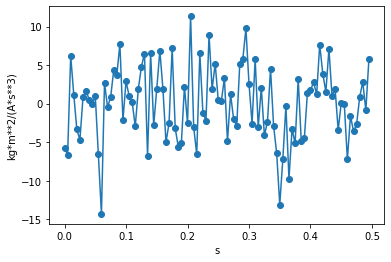

In [5]:
dt = 5*ms
fs = 1/dt
# signal is a noise with unit W
n = 100
sig = 5*np.random.randn(n)*V
sig.favunit = V
sig -= np.mean(sig)
ech_t = np.linspace(0, n-1, num=n)*dt

fig, ax = plt.subplots()
ax.plot(ech_t, sig, "-o")

In [6]:
print(np.std(sig))
print(np.var(sig))

4.785826391588568 kg*m**2/(A*s**3)
22.904134250425656 kg**2*m**4/(A**2*s**6)


Fourier transform of a signal has the same unit : 
$$X[k] = \sum_n^{N-1} x[k] e^{-i2\pi k n /N }$$

In [7]:
tf = np.fft.fft(sig, norm="ortho")
print(sig.dimension == tf.dimension)

True


Note that several versions of numpy's fft are available : 
 - `norm=backward` : $X[k]=\sum x[k]e^{-2ikn/N}$
 - `norm=forward` : $X[k]=\frac{1}{N}\sum x[k]e^{-2ikn/N}$
 - `norm=ortho`: $X[k]=\frac{1}{\sqrt{N}}\sum x[k]e^{-2ikn/N}$

In [8]:
sig_test = np.ones(10)
print(np.sum(np.fft.fft(sig_test, norm="backward")))
print(np.sum(np.fft.fft(sig_test, norm="forward")))
print(np.sum(np.fft.fft(sig_test, norm="ortho")))

print(np.fft.fft(sig, norm="ortho").dimension)
print(np.fft.fft(sig, norm="backward").dimension)
print(np.fft.fft(sig, norm="forward").dimension)

(10+0j)
(1+0j)
(3.1622776601683795+0j)
L**2*M/(I*T**3)
L**2*M/(I*T**3)
L**2*M/(I*T**3)


# Modulus
The modulus of a Fourier transform shall then have the squared unit

In [9]:
mod2 = tf.real**2 + tf.imag**2#np.real(tf * np.conjugate(tf))
print(mod2.dimension == tf.dimension**2)

True


# Frequencies

Given a sampling period, in second for eg, the sampling frequency is used to compute the frequencies for the fourier transform : 

In [10]:
dt = 5*s
fs = 1/dt
freqs = np.fft.fftfreq(len(mod2), d=dt)
print(freqs.dimension)
print(freqs)

1/T
[ 0.     0.002  0.004  0.006  0.008  0.01   0.012  0.014  0.016  0.018
  0.02   0.022  0.024  0.026  0.028  0.03   0.032  0.034  0.036  0.038
  0.04   0.042  0.044  0.046  0.048  0.05   0.052  0.054  0.056  0.058
  0.06   0.062  0.064  0.066  0.068  0.07   0.072  0.074  0.076  0.078
  0.08   0.082  0.084  0.086  0.088  0.09   0.092  0.094  0.096  0.098
 -0.1   -0.098 -0.096 -0.094 -0.092 -0.09  -0.088 -0.086 -0.084 -0.082
 -0.08  -0.078 -0.076 -0.074 -0.072 -0.07  -0.068 -0.066 -0.064 -0.062
 -0.06  -0.058 -0.056 -0.054 -0.052 -0.05  -0.048 -0.046 -0.044 -0.042
 -0.04  -0.038 -0.036 -0.034 -0.032 -0.03  -0.028 -0.026 -0.024 -0.022
 -0.02  -0.018 -0.016 -0.014 -0.012 -0.01  -0.008 -0.006 -0.004 -0.002] 1/s


# Plotting
Finally, we can easily plot the spectrum 

22.904134250425646 V**2


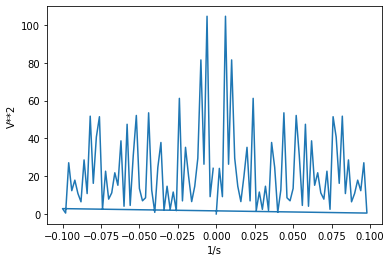

In [11]:
fig, ax = plt.subplots()
mod2.favunit = V**2
ax.plot(freqs, mod2)
print(np.mean(mod2))

# Frequency shift 

22.904134250425646 V**2


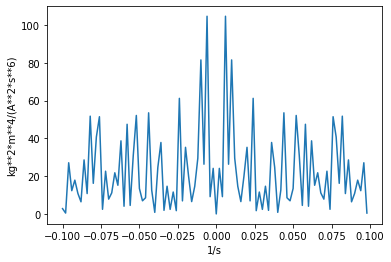

In [12]:
fig, ax = plt.subplots()
ax.plot(np.fft.fftshift(freqs),
        np.fft.fftshift(mod2))
print(np.mean(mod2))